# ANN Algorithm implementation on numerical dataset

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Read dataset

In [2]:
dataset=pd.read_csv('D:\Faaclty\level 3\selcted-1\ANN Algorithm(numerical)\Dataset/preprocessed_online_shoping_intention.csv')
dataset.drop(dataset.columns[0], axis=1,inplace = True)

In [3]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Visitor_New_Visitor,Visitor_Returning_Visitor,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.058197,0.0,0.0,0,0,1,0
1,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.0,0,0,1,0
2,0.0,0.0,0.0,0.0,1.0,0.058197,0.0,0.0,0,0,1,0
3,0.0,0.0,0.0,0.0,2.0,0.058197,0.0,0.0,0,0,1,0
4,0.0,0.0,0.0,0.0,10.0,0.020000,0.0,0.0,1,0,1,0


## Spliting dataset to Training & testing dataset

In [4]:
X = dataset.iloc[:, 0:11].values
y = dataset.iloc[:, 11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### built ANN model

In [5]:

model = Sequential()
model.add(Dense(11, activation='linear'))
#model.add(Dropout(0.001))
model.add(Dense(22, activation='relu'))
#model.add(Dropout(0.001))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])


In [7]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath="D:/Faaclty/level 3/selcted-1/ANN Algorithm(numerical)/weights.h5", verbose=1, save_best_only=True)


Epoch 1/1000
 1/20 [>.............................] - ETA: 10s - loss: 0.6779 - accuracy: 0.1425
Epoch 00001: val_loss improved from inf to 0.34661, saving model to D:/Faaclty/level 3/selcted-1/ANN Algorithm(numerical)\weights.h5
20/20 [==============================] - 1s 15ms/step - loss: 0.5291 - accuracy: 0.3584 - val_loss: 0.3466 - val_accuracy: 0.6528
Epoch 2/1000
 1/20 [>.............................] - ETA: 0s - loss: 0.3663 - accuracy: 0.6100
Epoch 00002: val_loss improved from 0.34661 to 0.16891, saving model to D:/Faaclty/level 3/selcted-1/ANN Algorithm(numerical)\weights.h5
20/20 [==============================] - 0s 7ms/step - loss: 0.2001 - accuracy: 0.8088 - val_loss: 0.1689 - val_accuracy: 0.8429
Epoch 3/1000
 1/20 [>.............................] - ETA: 0s - loss: 0.1641 - accuracy: 0.8525
Epoch 00003: val_loss improved from 0.16891 to 0.15993, saving model to D:/Faaclty/level 3/selcted-1/ANN Algorithm(numerical)\weights.h5
20/20 [==============================] - 0s 5

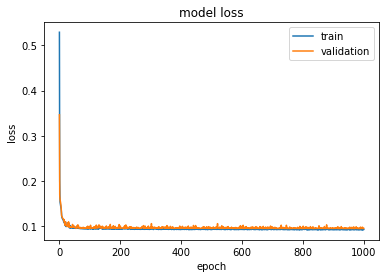

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=400, verbose=1, validation_split=0.2, callbacks=[checkpoint])
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [9]:
print(model.evaluate(X_test, y_test))
print(model.metrics_names)

78/78 [==============================] - 0s 982us/step - loss: 0.0973 - accuracy: 0.8812
[0.09732166677713394, 0.8811841011047363]
['loss', 'accuracy']


In [10]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1985  106]
 [ 187  188]]


0.8811841038118411

## load ANN model

In [14]:
from keras import models
c=models.load_model('D:/Faaclty\level 3/selcted-1/ANN Algorithm(numerical)/my_model.h5')
c.load_weights('D:/Faaclty\level 3/selcted-1/ANN Algorithm(numerical)/weights.h5')

In [15]:
y_pred = c.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [1 0]
 [1 1]
 [0 0]]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1989  102]
 [ 167  208]]


0.8909164639091647